In [15]:
import gzip
import json
import warnings
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
#from sklearn.preprocessing import OneHotEncoder
import timeit

In [16]:
#Manage output file
output_file_name="penguin-performance.txt"
output_list=[]

def print_output(line):
    print(line)
    output_list.append(line)

In [17]:
#read the dataset
file_path_penguins ="penguins.csv"
data_set_penguins = pd.read_csv(file_path_penguins)
print(data_set_penguins.head())

  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7                181   
1  Adelie  Torgersen              39.5             17.4                186   
2  Adelie  Torgersen              40.3             18.0                195   
3  Adelie  Torgersen              36.7             19.3                193   
4  Adelie  Torgersen              39.3             20.6                190   

   body_mass_g     sex  
0         3750    MALE  
1         3800  FEMALE  
2         3250  FEMALE  
3         3450  FEMALE  
4         3650    MALE  


In [18]:
#convert island and sex to 1-hot vectors 
island_one_hot = pd.get_dummies(data_set_penguins['island'], prefix='island')
sex_one_hot = pd.get_dummies(data_set_penguins['sex'], prefix='sex')
one_hot_vector = pd.concat([data_set_penguins,island_one_hot, sex_one_hot], axis=1)
one_hot_vector = one_hot_vector.drop(['island', 'sex'], axis=1)
print(one_hot_vector.head())
one_hot_vector.to_csv('one_hot_penguins.csv', index=False)

  species  culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0  Adelie              39.1             18.7                181         3750   
1  Adelie              39.5             17.4                186         3800   
2  Adelie              40.3             18.0                195         3250   
3  Adelie              36.7             19.3                193         3450   
4  Adelie              39.3             20.6                190         3650   

   island_Biscoe  island_Dream  island_Torgersen  sex_FEMALE  sex_MALE  
0              0             0                 1           0         1  
1              0             0                 1           1         0  
2              0             0                 1           1         0  
3              0             0                 1           1         0  
4              0             0                 1           0         1  


In [19]:
# manual conversion using categorization
manual_cat = data_set_penguins
manual_cat['island'] = pd.Categorical(manual_cat['island']).codes
manual_cat['sex'] = pd.Categorical(manual_cat['sex']).codes
print(manual_cat.head())
manual_cat.to_csv('manual_cat_penguins.csv', index=False)

  species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie       2              39.1             18.7                181   
1  Adelie       2              39.5             17.4                186   
2  Adelie       2              40.3             18.0                195   
3  Adelie       2              36.7             19.3                193   
4  Adelie       2              39.3             20.6                190   

   body_mass_g  sex  
0         3750    1  
1         3800    0  
2         3250    0  
3         3450    0  
4         3650    1  


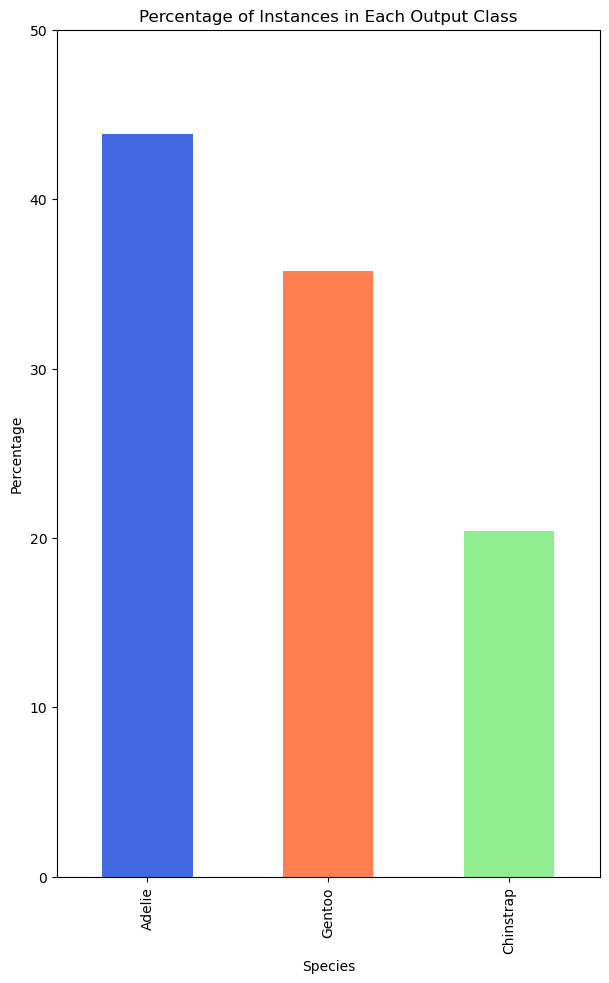

In [20]:
# plotting the % using one_hot_vector
plot = one_hot_vector
class_counts = plot['species'].value_counts()
class_percentages = (class_counts / len(plot)) * 100
colors = ['royalblue', 'coral', 'lightgreen']
plt.figure(figsize=(7, 11))
class_percentages.plot(kind='bar', color=colors)
plt.title('Percentage of Instances in Each Output Class')
plt.xlabel('Species')
plt.ylabel('Percentage')
plt.ylim(0, 50)
plt.savefig('penguin-classes.jpg')

In [21]:
#Class stats to calculate avarage and variance for multiple runs of a classifier
class Stats:    
    def __init__(self):
        self.accuracy_list = []
        self.macro_average_F1_list = []
        self.weighted_average_F1_list = []

    def append_accuracy(self,value):
        self.accuracy_list.append(value)
    def append_macro_average_f1(self,value):
        self.macro_average_F1_list.append(value)    
    def append_weighted_average_f1(self,value):
        self.weighted_average_F1_list.append(value)

    def report(self):
        accuracy_array = np.array(self.accuracy_list)
        macro_average_F1_array = np.array(self.macro_average_F1_list)
        weighted_average_F1_array = np.array(self.weighted_average_F1_list)

        accuracy_mean = np.mean(accuracy_array)
        accuracy_variance = np.var(accuracy_array)

        macro_average_F1_mean = np.mean(macro_average_F1_array)
        macro_average_F1_variance = np.var(macro_average_F1_array)

        weighted_average_F1_mean = np.mean(weighted_average_F1_array)
        weighted_average_F1_variance = np.var(weighted_average_F1_array)

        print_output(f"(A) Accuracy: Mean = {accuracy_mean}, Variance ={accuracy_variance}")
        print_output(f"(B) Macro Average F1: Mean = {macro_average_F1_mean}, Variance = {macro_average_F1_variance}")
        print_output(f"(C) Weighted Average F1: Mean = {weighted_average_F1_mean} , Variance = {weighted_average_F1_variance}")
        print_output("*" * 70 + "\n")

In [22]:
split_set = one_hot_vector
X = split_set .drop('species', axis=1)
y = split_set ['species']
X_train, X_test, y_train, y_test = train_test_split(X, y)
print("X_train shape:", X_train.shape) #number of samples, number of features
print("X_test shape:", X_test.shape)   #number of samples and features in the testing set
print("y_train shape:", y_train.shape) #one-dimensional array representing the number of samples
print("y_test shape:", y_test.shape)   #one-dimensional array representing the number of samples at the testing set

X_train shape: (249, 9)
X_test shape: (84, 9)
y_train shape: (249,)
y_test shape: (84,)


4(a)


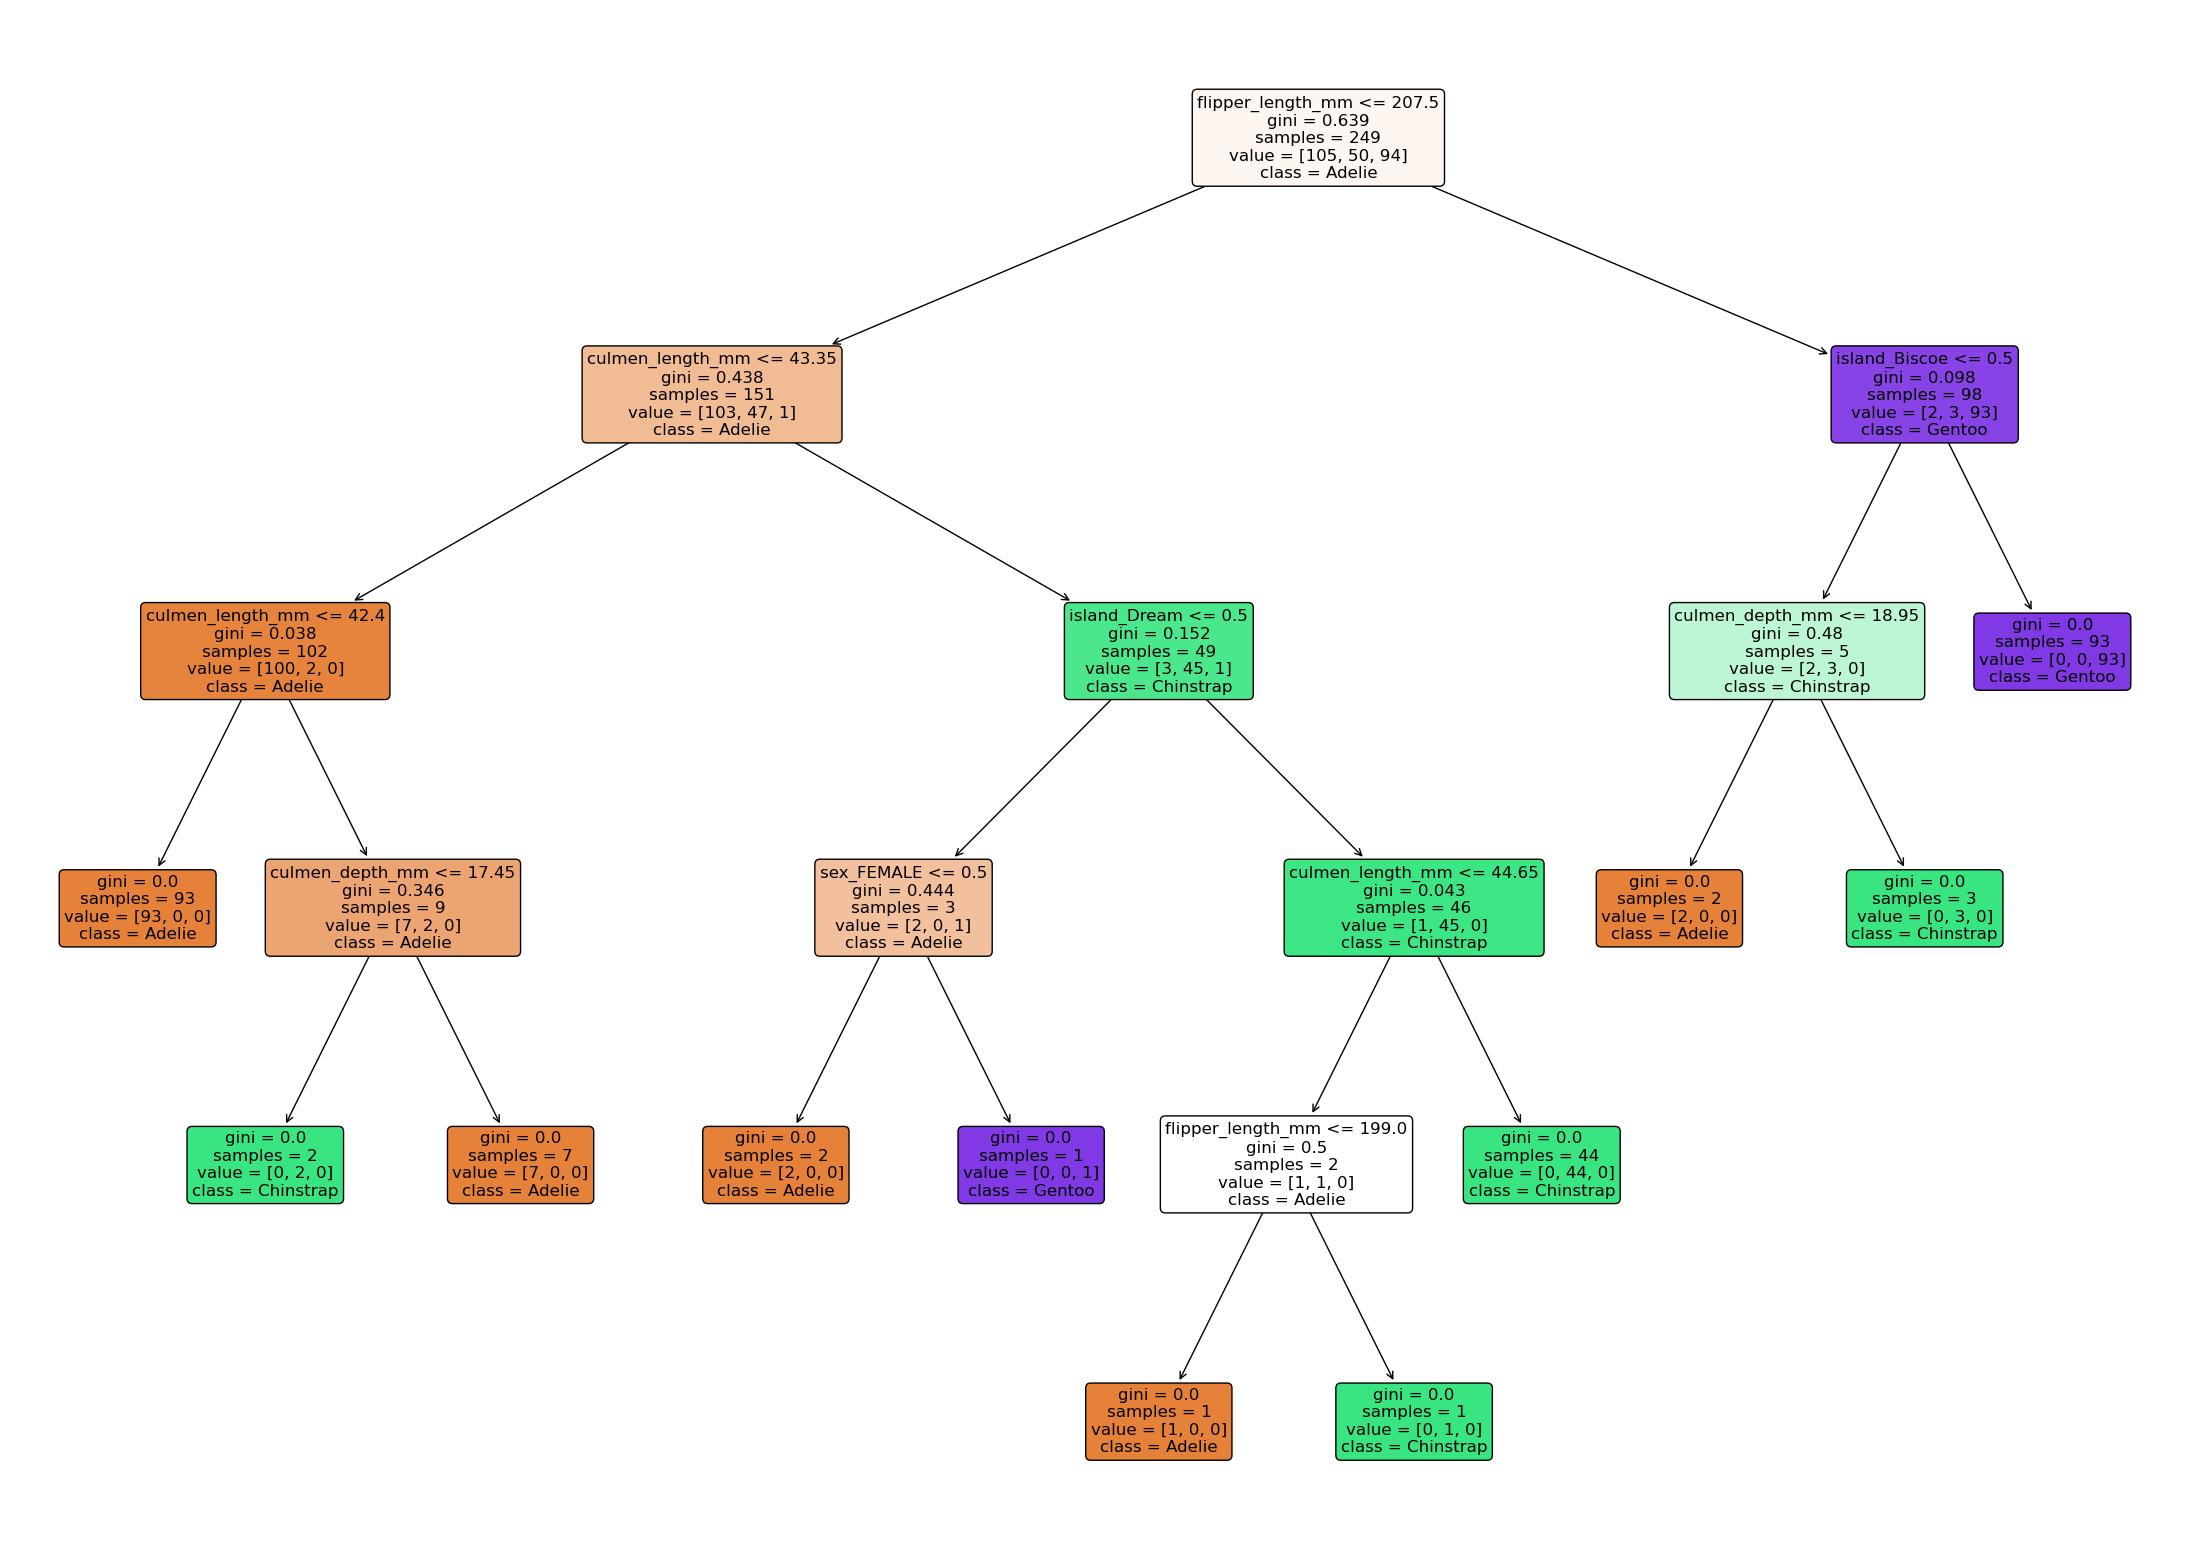

5(a)
(A) Base-DT-max_depth=8
--------------------------------------------------

(B) Confusion Matrix:

[[41  0  0]
 [ 1 17  0]
 [ 0  0 25]]
--------------------------------------------------


(C) Classification metrics:

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        41
   Chinstrap       1.00      0.94      0.97        18
      Gentoo       1.00      1.00      1.00        25

    accuracy                           0.99        84
   macro avg       0.99      0.98      0.99        84
weighted avg       0.99      0.99      0.99        84

--------------------------------------------------


(D) Accuracy: 0.9881

Macro-average F1: 0.9865

Weighted-average F1: 0.9880

--------------------------------------------------

6(a)
(A) Accuracy: Mean = 0.9857142857142858, Variance =2.2675736961451505e-05
(B) Macro Average F1: Mean = 0.9836592307605774, Variance = 3.1380061479688705e-05
(C) Weighted Average F1: Mean = 0.9855522369590405 ,

In [23]:
# Base-DT
stats = Stats()

for i in range(1,6):
    base_dt_classifier = DecisionTreeClassifier()
    base_dt_classifier.fit(X_train, y_train)
    y_pred = base_dt_classifier.predict(X_test)
    
    if(i==1):
        print("4(a)")
        plt.figure(figsize=(28, 20))
        plot_tree(base_dt_classifier, filled=True, feature_names=X.columns, class_names=y.unique(),fontsize=12 ,rounded=True)
        plt.show()
    
        print_output("5(a)")
        print_output("(A) Base-DT") 
        print_output("-" * 50 + "\n")
        print_output(f"(B) Confusion Matrix:\n\n{confusion_matrix(y_test, y_pred)}")
        print_output("-" * 50 + "\n")
        print_output("\n(C) Classification metrics:\n")
        print_output(classification_report(y_test, y_pred))
        accuracy = accuracy_score(y_test, y_pred)
        macro_f1 = f1_score(y_test, y_pred, average='macro')
        weighted_f1 = f1_score(y_test, y_pred, average='weighted')
        print_output("-" * 50 + "\n")
        print_output("\n(D) Accuracy: {:.4f}\n".format(accuracy))
        print_output("Macro-average F1: {:.4f}\n".format(macro_f1))
        print_output("Weighted-average F1: {:.4f}\n".format(weighted_f1))
        print_output("-" * 50 + "\n")


    report_dict = classification_report(y_test, y_pred, output_dict=True)

    stats.append_accuracy(report_dict['accuracy'])
    stats.append_macro_average_f1(report_dict['macro avg']['f1-score'])
    stats.append_weighted_average_f1(report_dict['weighted avg']['f1-score'])

print_output("6(a)")
stats.report()

4(b)


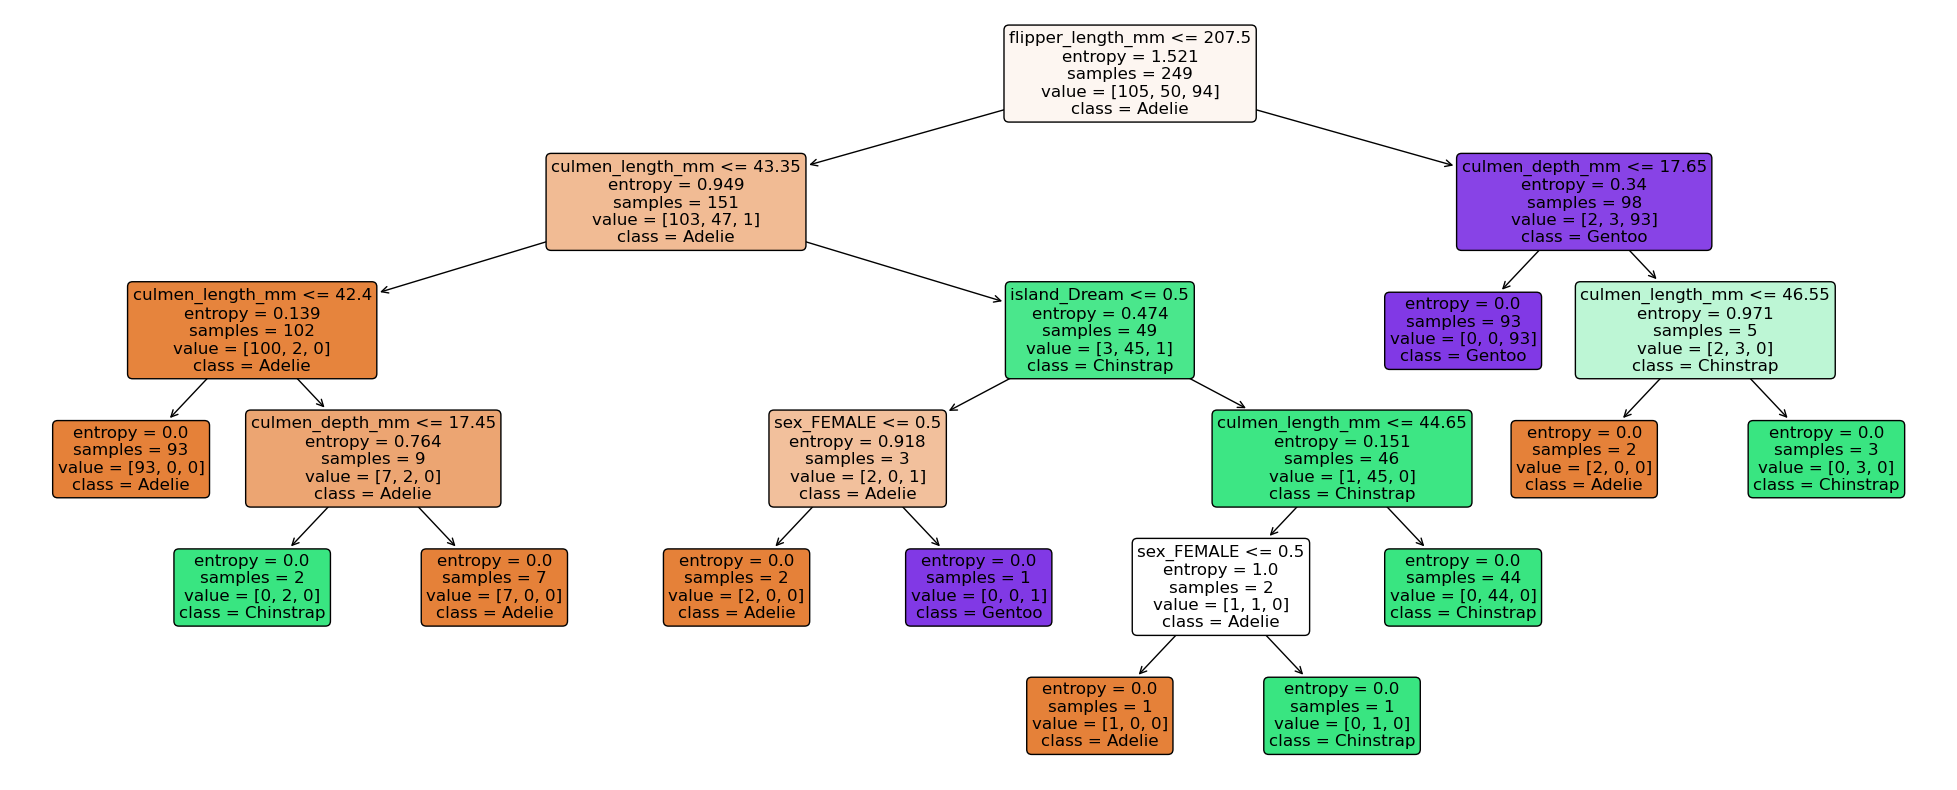

5(b)
(A) Top-DT-criterion={best_params['criterion']}-max_depth=None-min_samples_split=2
--------------------------------------------------

(B) Confusion Matrix:

[[41  0  0]
 [ 1 17  0]
 [ 0  0 25]]
--------------------------------------------------


(C) (D) Classification metrics:

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        41
   Chinstrap       1.00      0.94      0.97        18
      Gentoo       1.00      1.00      1.00        25

    accuracy                           0.99        84
   macro avg       0.99      0.98      0.99        84
weighted avg       0.99      0.99      0.99        84

--------------------------------------------------

6(b)
(A) Accuracy: Mean = 0.9880952380952381, Variance =0.0
(B) Macro Average F1: Mean = 0.9864601262191623, Variance = 0.0
(C) Weighted Average F1: Mean = 0.9879968855011884 , Variance = 0.0
**********************************************************************



In [24]:
#Top-DT
stats = Stats()

param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [5, 10, None],  #depth values
        'min_samples_split': [2, 5, 10] } #split values
    
for i in range(1,6):
    top_dt_classifier = DecisionTreeClassifier()
    grid_search = GridSearchCV(top_dt_classifier, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_top_dt_classifier = DecisionTreeClassifier(**best_params)
    best_top_dt_classifier.fit(X_train, y_train)
    y_pred = best_top_dt_classifier.predict(X_test)
 
    if(i==1):
        print("4(b)")
        plt.figure(figsize=(25, 10))
        plot_tree(best_top_dt_classifier, filled=True, feature_names=X.columns, class_names=y.unique(),fontsize=12, rounded=True)
        plt.show()
        print_output("5(b)")
        print_output("(A) Top-DT-criterion={best_params['criterion']}-"
              f"max_depth={best_params['max_depth']}-"
              f"min_samples_split={best_params['min_samples_split']}"
                    )
        print_output("-" * 50 + "\n")
        print_output(f"(B) Confusion Matrix:\n\n{confusion_matrix(y_test, y_pred)}")
        print_output("-" * 50 + "\n")
        print_output("\n(C) (D) Classification metrics:\n")
        print_output(classification_report(y_test, y_pred))
        print_output("-" * 50 + "\n")
   
        report_dict = classification_report(y_test, y_pred, output_dict=True)

    stats.append_accuracy(report_dict['accuracy'])
    stats.append_macro_average_f1(report_dict['macro avg']['f1-score'])
    stats.append_weighted_average_f1(report_dict['weighted avg']['f1-score'])

print_output("6(b)")
stats.report()

In [25]:
#Base-MLP
stats = Stats()

for i in range(1,6):
    base_mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 100), activation='logistic',solver='sgd')
    base_mlp_classifier.fit(X_train, y_train)
    y_pred = base_mlp_classifier.predict(X_test)
        
    if(i==1):        
        print_output("5(c)")
        print_output("A)\n")
        print_output("Base-MLP: Multi-Layered Perceptron\n")
        print_output("Hyperparameters:\n")
        print_output("Hidden Layer Sizes: (100, 100)\n")
        print_output("Activation Function: Logistic\n")
        print_output("Solver: Stochastic Gradient Descent (SGD)\n\n")
        print_output("-" * 50 + "\n")

        print_output("B)\n")
        print_output("Confusion Matrix:\n")
        print_output(str(confusion_matrix(y_test, y_pred)) + "\n\n")
        print_output("-" * 50 + "\n")

        print_output("C)\n")
        print_output(classification_report(y_test, y_pred, zero_division=0) + "\n")
        print_output("-" * 50 + "\n")

        print_output("D)\n")
        accuracy = accuracy_score(y_test, y_pred)
        macro_f1 = f1_score(y_test, y_pred, average='macro')
        weighted_f1 = f1_score(y_test, y_pred, average='weighted')
        print_output("\nAccuracy: {:.4f}\n".format(accuracy))
        print_output("Macro-average F1: {:.4f}\n".format(macro_f1))
        print_output("Weighted-average F1: {:.4f}\n".format(weighted_f1))
        print_output("-" * 50 + "\n")
        
    report_dict = classification_report(y_test, y_pred,zero_division=0, output_dict=True)

    stats.append_accuracy(report_dict['accuracy'])
    stats.append_macro_average_f1(report_dict['macro avg']['f1-score'])
    stats.append_weighted_average_f1(report_dict['weighted avg']['f1-score'])

print_output("6(c)")
stats.report()

5(c)
A)

Base-MLP: Multi-Layered Perceptron

Hyperparameters:

Hidden Layer Sizes: (100, 100)

Activation Function: Logistic

Solver: Stochastic Gradient Descent (SGD)


--------------------------------------------------

B)

Confusion Matrix:

[[41  0  0]
 [18  0  0]
 [25  0  0]]


--------------------------------------------------

C)

              precision    recall  f1-score   support

      Adelie       0.49      1.00      0.66        41
   Chinstrap       0.00      0.00      0.00        18
      Gentoo       0.00      0.00      0.00        25

    accuracy                           0.49        84
   macro avg       0.16      0.33      0.22        84
weighted avg       0.24      0.49      0.32        84


--------------------------------------------------

D)


Accuracy: 0.4881

Macro-average F1: 0.2187

Weighted-average F1: 0.3202

--------------------------------------------------

6(c)
(A) Accuracy: Mean = 0.488095238095238, Variance =3.0814879110195774e-33
(B) Macro Average 

In [26]:
#Top-MLP

stats = Stats()

param_grid = {
    'hidden_layer_sizes': [(30, 50), (10, 10, 10)],
    'activation': ['relu', 'tanh', 'logistic'], 
    'solver': ['adam', 'sgd'],
    'max_iter': [200, 400, 1000]  # Add more options for max_iter to solve convergence problem
}
    
for i in range(1,6):    
    top_mlp_classifier = MLPClassifier(max_iter=1000, early_stopping=True, validation_fraction=0.1, n_iter_no_change=10)
    grid_search = GridSearchCV(top_mlp_classifier, param_grid, cv=3)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_mlp_classifier = MLPClassifier(**best_params)
    best_mlp_classifier.fit(X_train, y_train)
    y_pred = best_mlp_classifier.predict(X_test)
        
    if(i==1):
        print_output("5(d)")
        print_output("A)Top-MLP: Multi-Layered Perceptron with GridSearch\n")
        print_output(f"Best Hyperparameters: {best_params}\n\n")
        print_output("-" * 50 + "\n")

        print_output("B)\n")
        print_output("Confusion Matrix:\n")
        print_output(str(confusion_matrix(y_test, y_pred)) + "\n\n")
        print_output("-" * 50 + "\n")

        print_output("C)\n")
        print_output(classification_report(y_test, y_pred, zero_division=0) + "\n")    
        print_output("-" * 50 + "\n")

        print_output("D)\n")
        accuracy = accuracy_score(y_test, y_pred)
        macro_f1 = f1_score(y_test, y_pred, average='macro')
        weighted_f1 = f1_score(y_test, y_pred, average='weighted')
        print_output("\nAccuracy: {:.4f}\n".format(accuracy))
        print_output("Macro-average F1: {:.4f}\n".format(macro_f1))
        print_output("Weighted-average F1: {:.4f}\n".format(weighted_f1))
        print_output("-" * 50 + "\n")

    report_dict = classification_report(y_test, y_pred,zero_division=0, output_dict=True)

    stats.append_accuracy(report_dict['accuracy'])
    stats.append_macro_average_f1(report_dict['macro avg']['f1-score'])
    stats.append_weighted_average_f1(report_dict['weighted avg']['f1-score'])

print_output("6(d)")
stats.report()

5(d)
A)Top-MLP: Multi-Layered Perceptron with GridSearch

Best Hyperparameters: {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'max_iter': 200, 'solver': 'adam'}


--------------------------------------------------

B)

Confusion Matrix:

[[40  0  1]
 [18  0  0]
 [ 4  0 21]]


--------------------------------------------------

C)

              precision    recall  f1-score   support

      Adelie       0.65      0.98      0.78        41
   Chinstrap       0.00      0.00      0.00        18
      Gentoo       0.95      0.84      0.89        25

    accuracy                           0.73        84
   macro avg       0.53      0.61      0.56        84
weighted avg       0.60      0.73      0.65        84


--------------------------------------------------

D)


Accuracy: 0.7262

Macro-average F1: 0.5568

Weighted-average F1: 0.6451

--------------------------------------------------

6(d)
(A) Accuracy: Mean = 0.5357142857142857, Variance =0.009070294784580496
(B) Macro Average

In [27]:
#generate output file
with open(output_file_name, 'w') as output_file:
      for line in output_list:
            output_file.write(line + "\n") 